# **Black Friday Sales EDA**
aiadventures-dataset-2

**About Dataset**

**Dataset History**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


**Tasks to perform**

Purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

1. DATA PREPROCESSING

* Check basic statistics of dataset
* Check for missing values in the data
* check for unique values in data
* Perform EDA
* Purchase Distribution
* check for outliers
* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
* Drop unnecessary fields
* Convert categorical data into integer using map function (e.g 'Gender' column)
* missing value treatment
* Rename columns
* fill nan values
* map range variables into integers (e.g 'Age' column)

2. Data Visualisation
* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* check for more possible plots

kaggle link: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

In [2]:
#membagi data
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Black Friday Sales Dataset.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
#melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# DATA PREPROCESSING


Langkah pertama yang dilakukan dalam tahapan ini adalah mengubah nama variabel yang terlalu panjang menjadi lebih pendek. Hal tersebut dikarenakan hanya untuk mengefektifkan penulisan kode dalam Python saja.

In [4]:
#rename columns
data=data.rename(columns={'Stay_In_Current_City_Years':'Stay_Years',
                          'Product_Category_1':'Product1',
                          'Product_Category_2':'Product2',
                          'Product_Category_3':'Product3'})

In [5]:
#statistika deskriptif
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_Years,Marital_Status,Product1,Product2,Product3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [6]:
#checking duplicate
data.duplicated().sum()

0

Hasil di atas menunjukkan bahwa tidak terdapat data duplikat sehingga bisa dilanjutkan ke tahap selanjutnya.

In [7]:
#Cek data unik
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [8]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
data.Stay_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [11]:
#jumlah per kategori
data.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [12]:
data.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
data.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [14]:
data.Stay_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_Years, dtype: int64

In [16]:
#Jumlah Purchase berdasarkan kategori tertentu
data.groupby('Gender')['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [17]:
data.groupby('Age')['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

In [18]:
data.groupby('City_Category')['Purchase'].sum()

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

In [19]:
data.groupby('Stay_Years')['Purchase'].sum()

Stay_Years
0      682979229
1     1792872533
2      949173931
3      884902659
4+     785884390
Name: Purchase, dtype: int64

In [21]:
#Jumlah Purchase berdasarkan beberapa kategori
data.groupby(['Gender','Age'])['Purchase'].sum()

Gender  Age  
F       0-17       42385978
        18-25     205475842
        26-35     442976233
        36-45     243438963
        46-50     116706864
        51-55      89465997
        55+        45782765
M       0-17       92527205
        18-25     708372833
        26-35    1588794345
        36-45     783130921
        46-50     304136539
        51-55     277633647
        55+       154984610
Name: Purchase, dtype: int64

In [22]:
data.groupby(['Gender','Age','City_Category'])['Purchase'].sum()

Gender  Age    City_Category
F       0-17   A                 11324587
               B                 13844363
               C                 17217028
        18-25  A                 51104517
               B                 93774009
               C                 60597316
        26-35  A                152198055
               B                183691038
               C                107087140
        36-45  A                 61933245
               B                 97271104
               C                 84234614
        46-50  A                 10919482
               B                 55201613
               C                 50585769
        51-55  A                 15486422
               B                 37662356
               C                 36317219
        55+    A                  3363607
               B                 12172525
               C                 30246633
M       0-17   A                 10592254
               B                 34621137
     

In [23]:
data.groupby(['Gender','Age','City_Category','Stay_Years'])['Purchase'].sum()

Gender  Age   City_Category  Stay_Years
F       0-17  A              0               985489
                             1              2671539
                             2              1441143
                             3              6226416
              B              0              2132767
                                             ...   
M       55+   C              0              9262894
                             1             33777796
                             2             19309183
                             3             15277849
                             4+            11966757
Name: Purchase, Length: 207, dtype: int64

In [24]:
#checking missing value per variabel
data.isna().sum()

User_ID                0
Product_ID             0
Gender                 0
Age                    0
Occupation             0
City_Category          0
Stay_Years             0
Marital_Status         0
Product1               0
Product2          173638
Product3          383247
Purchase               0
dtype: int64

Variabel yang mengandung missing value adalah Product2 dan Product3. Missing value tersebut akan ditangani dengan cara mengisi data missing tersebut dengan nilai modus per variabelnya.

In [33]:
#nilai modus Product2 dan Product3
import statistics as st

Product_2=data.Product2.dropna()
Product_3=data.Product3.dropna()

mod2=st.mode(Product_2)
mod3=st.mode(Product_3)

print('Nilai Modus Product2:',mod2,'\nNilai Modus Product3:',mod3)

Nilai Modus Product2: 8.0 
Nilai Modus Product3: 16.0


In [34]:
#mengisi missing value dengan nilai modus
data.fillna({'Product2':mod2,'Product3':mod3},inplace=True)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_Years,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


In [35]:
data.isna().sum()

User_ID           0
Product_ID        0
Gender            0
Age               0
Occupation        0
City_Category     0
Stay_Years        0
Marital_Status    0
Product1          0
Product2          0
Product3          0
Purchase          0
dtype: int64

Sekarang tidak ada variabel yang memiliki missing value. Langkah selanjutnya yaitu mendeteksi outlier pada variabel Pruchase.

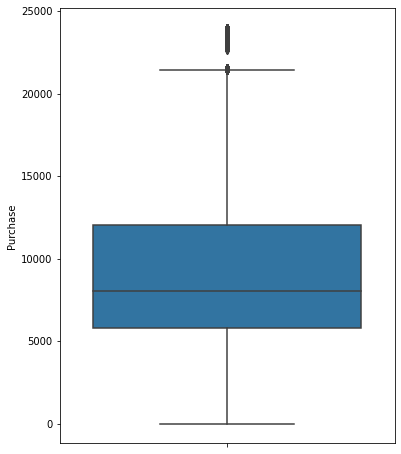

In [39]:
#deteksi outlier dengan boxplot
plt.figure(figsize=(6,8))
sns.boxplot(y=data.Purchase)

Berdasarkan boxplot tersebut masih terindikasi adanya outliers sehingga harus ditangani. Pada kali ini akan dilakukan penanganan outlier dengan winsorizing 90%.

Data dengan penanganan winsorizing akan tetap memiliki jumlah data yang sama, yaitu: 550068 



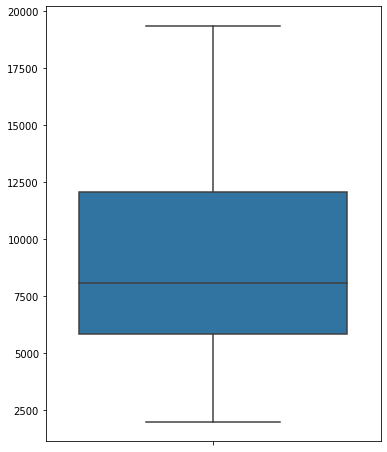

In [43]:
#penanganan outlier dengan winsorizing
from scipy.stats.mstats import winsorize

datawin=winsorize(data.Purchase,(0.05,0.05)) #membentuk data baru dengan winsorizing 90% 
print('Data dengan penanganan winsorizing akan tetap memiliki jumlah data yang sama, yaitu:',len(datawin),'\n')

plt.figure(figsize=(6,8))
sns.boxplot(y=datawin) #checking ulang outlier menggunakan histogram

Berdasarkan gambar boxplot di atas dapat dilihat bahwa data Purchase setelah winsorizing 90% sudah tidak memiliki outliers sehingga data Purchase dengan winsorizing akan ditambahkan ke dataset dan data Purchase sebelumnya akan dibuang.

In [44]:
#menambahkan data Purchase winsorizing dan membuang data Purchase

data=data.assign(Purchase_Win=datawin)
data=data.drop('Purchase',axis=1)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_Years,Marital_Status,Product1,Product2,Product3,Purchase_Win
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,1984
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,1984
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,1984
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,1984


# Data Visualisation
* Visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* Check for more possible plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

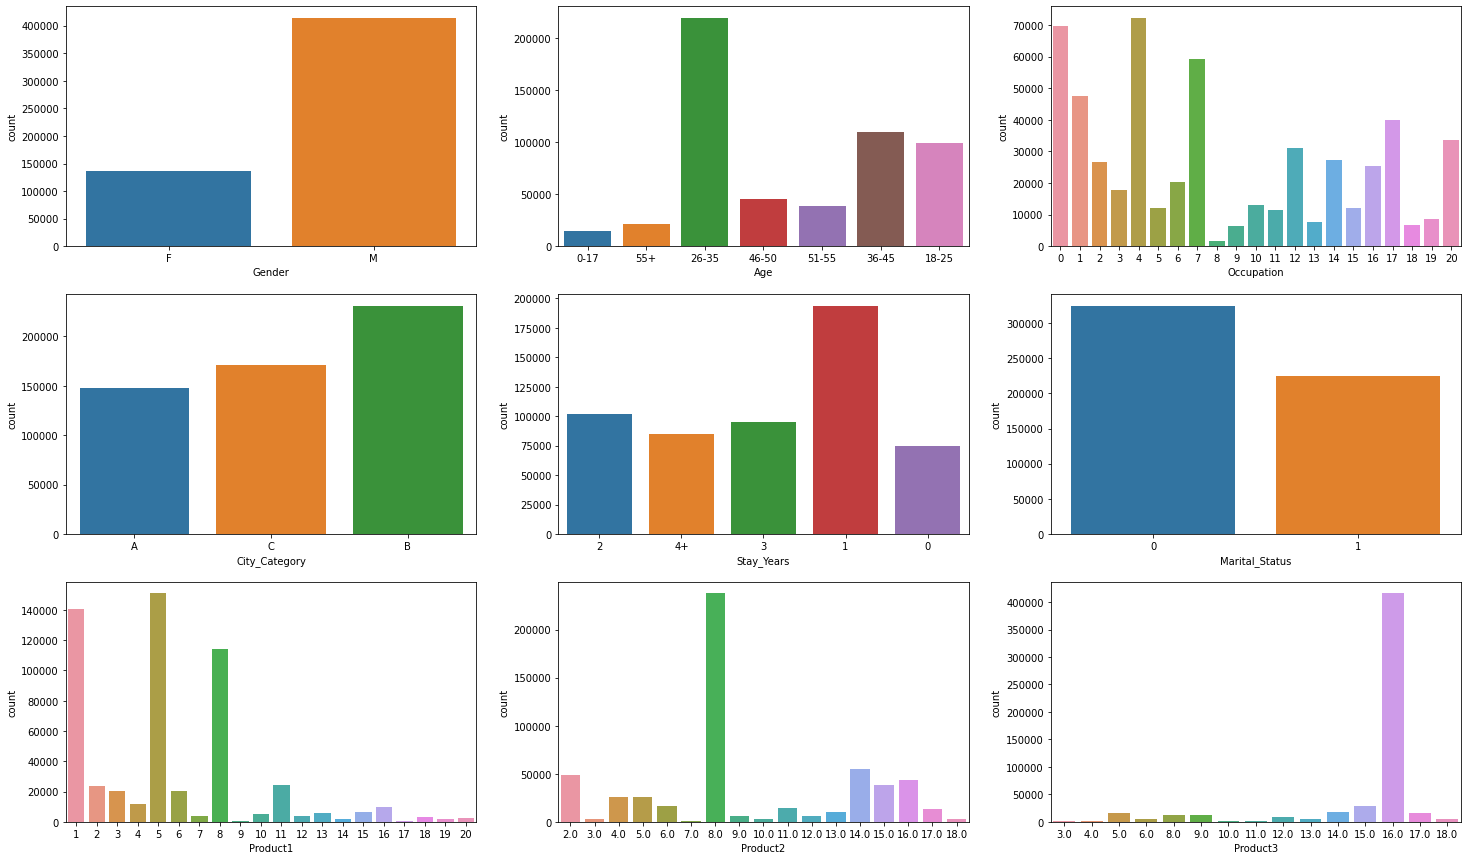

In [56]:
#visualisasi jumlah per ketegori dengan barchart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.countplot(data.Gender)

plt.subplot(3,3,2)
sns.countplot(data.Age)

plt.subplot(3,3,3)
sns.countplot(data.Occupation)

plt.subplot(3,3,4)
sns.countplot(data.City_Category)

plt.subplot(3,3,5)
sns.countplot(data.Stay_Years)

plt.subplot(3,3,6)
sns.countplot(data.Marital_Status)

plt.subplot(3,3,7)
sns.countplot(data.Product1)

plt.subplot(3,3,8)
sns.countplot(data.Product2)

plt.subplot(3,3,9)
sns.countplot(data.Product3)

Beberapa Informasi yang didapatkan dari visualisasi di atas adalah:

* Jumlah pembeli dengan kategori Laki-laki lebih banyak dibandingkan dengan Wanita
* Kategori umur yang mendominasi pembeli adalah 26-35 tahun
* Product1 paling banyak dibeli pada kategori 5, kemudian kategori 1, dan kategori 8
* Kategori 8 mendominasi jumlah pembelian di Product2
* Kategori 16 mendominasi jumlah pembelian di Product3

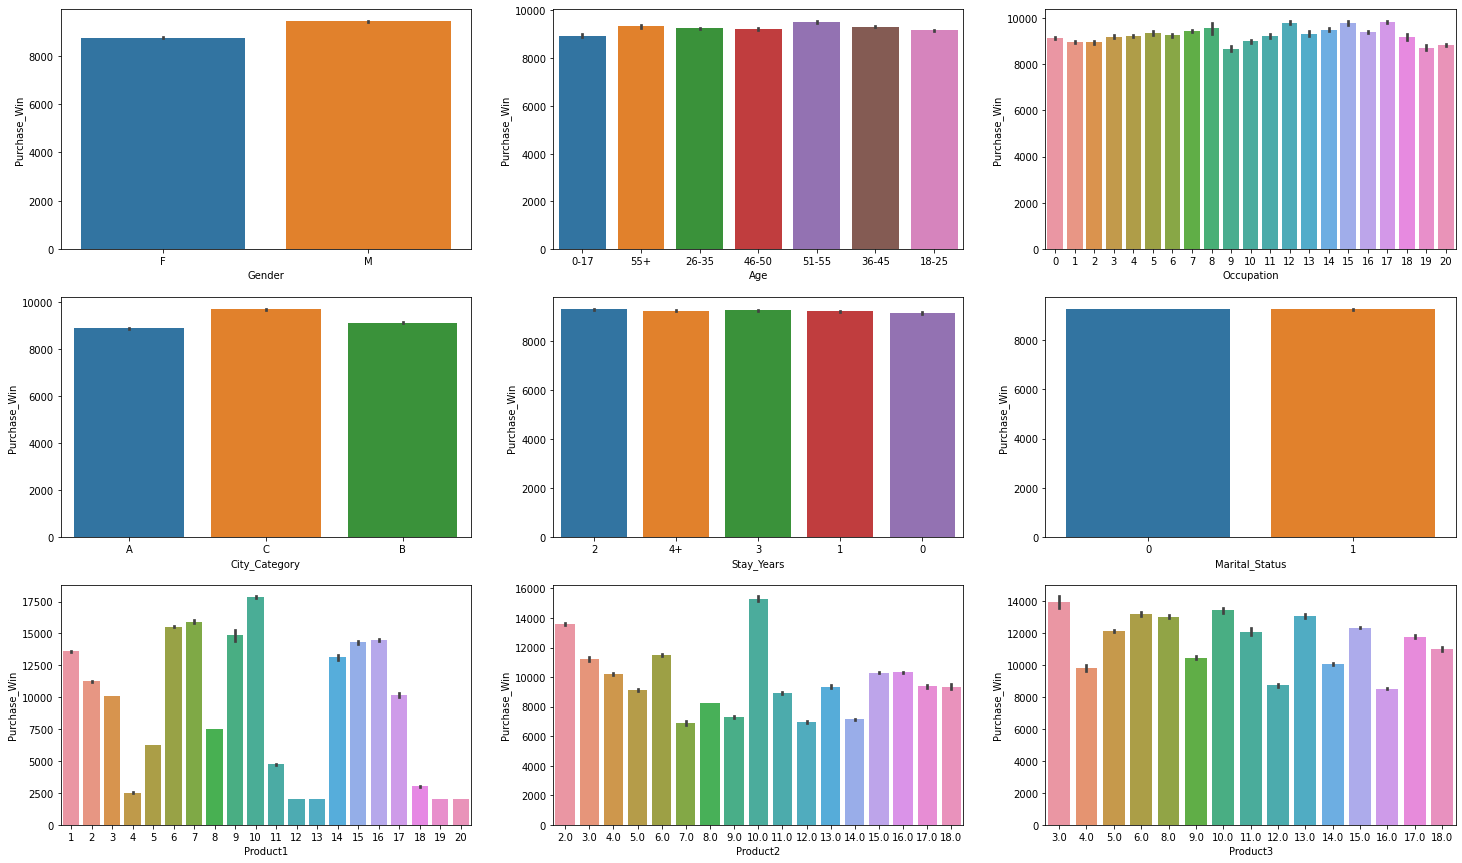

In [61]:
#visualisasi jumlah purchase per ketegori dengan barchart
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
sns.barplot(x='Gender',y='Purchase_Win',data=data)

plt.subplot(3,3,2)
sns.barplot(x='Age',y='Purchase_Win',data=data)

plt.subplot(3,3,3)
sns.barplot(x='Occupation',y='Purchase_Win',data=data)

plt.subplot(3,3,4)
sns.barplot(x='City_Category',y='Purchase_Win',data=data)

plt.subplot(3,3,5)
sns.barplot(x='Stay_Years',y='Purchase_Win',data=data)

plt.subplot(3,3,6)
sns.barplot(x='Marital_Status',y='Purchase_Win',data=data)

plt.subplot(3,3,7)
sns.barplot(x='Product1',y='Purchase_Win',data=data)

plt.subplot(3,3,8)
sns.barplot(x='Product2',y='Purchase_Win',data=data)

plt.subplot(3,3,9)
sns.barplot(x='Product3',y='Purchase_Win',data=data)

Hasil jumlah Purchase berdasarkan kategori Gender, Age, Occupation, City_Category, Stay_Years, dan Marital_Status memiliki hasil yang hampir sama pada masing-masing kategorinya. Sedangkan berdasarkan Product1, kategori 10 memiliki hasil jumlah tertinggi. Kategori dengan hasil jumlah Purchase tertinggi pada Product2 dan Product3 massing-masing adalah kategori 10 dan 3.

([<matplotlib.patches.Wedge at 0x7f8d7f3981d0>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31%'),
  Text(0.3988350646218405, -0.4482528206582668, '27%')])

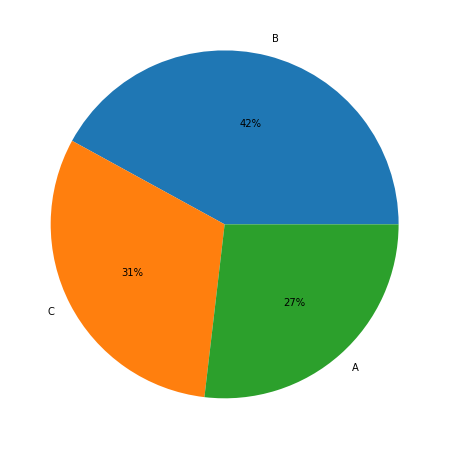

In [64]:
city=data.City_Category.value_counts()

plt.figure(figsize=(10,8))
plt.pie(city,labels = city.index, autopct='%.0f%%')

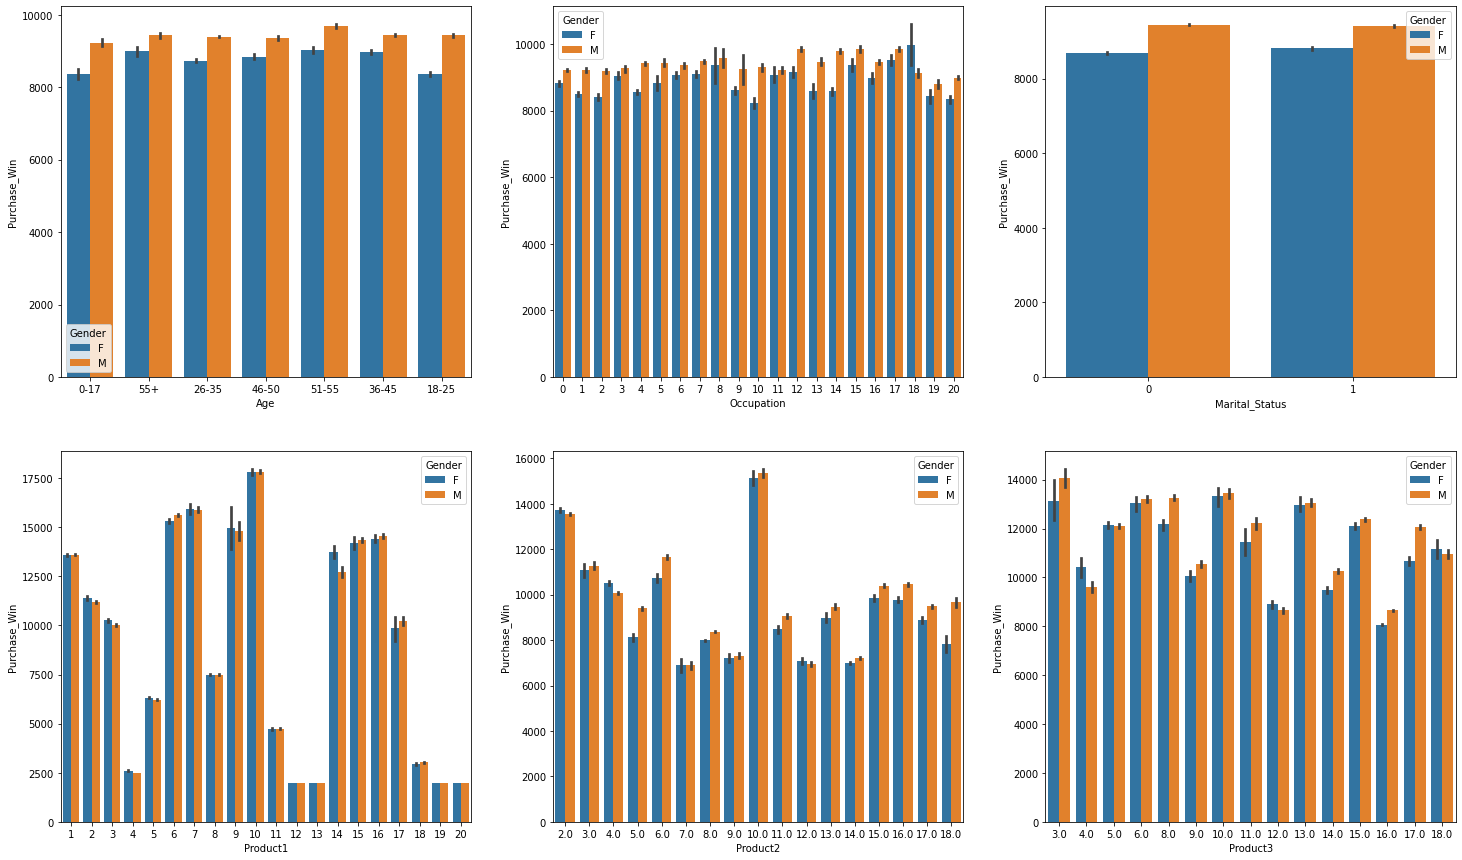

In [67]:
#visualisasi jumlah purchase berdasarkan beberapa ketegori dengan barchart
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.barplot(x='Age',y='Purchase_Win',hue='Gender',data=data)

plt.subplot(2,3,2)
sns.barplot(x='Occupation',y='Purchase_Win',hue='Gender',data=data)

plt.subplot(2,3,3)
sns.barplot(x='Marital_Status',y='Purchase_Win',hue='Gender',data=data)

plt.subplot(2,3,4)
sns.barplot(x='Product1',y='Purchase_Win',hue='Gender',data=data)

plt.subplot(2,3,5)
sns.barplot(x='Product2',y='Purchase_Win',hue='Gender',data=data)

plt.subplot(2,3,6)
sns.barplot(x='Product3',y='Purchase_Win',hue='Gender',data=data)

Berdasarkan gambar di atas dapat dilihat bahwa Gender Laki-Laki memiliki jumlah Purchase lebih tinggi pada masing-masing katagori (per barchart). Hal tersebut berbanding lurus dengan jumlah pembeli yang didominasi oleh Gender Laki-Laki.

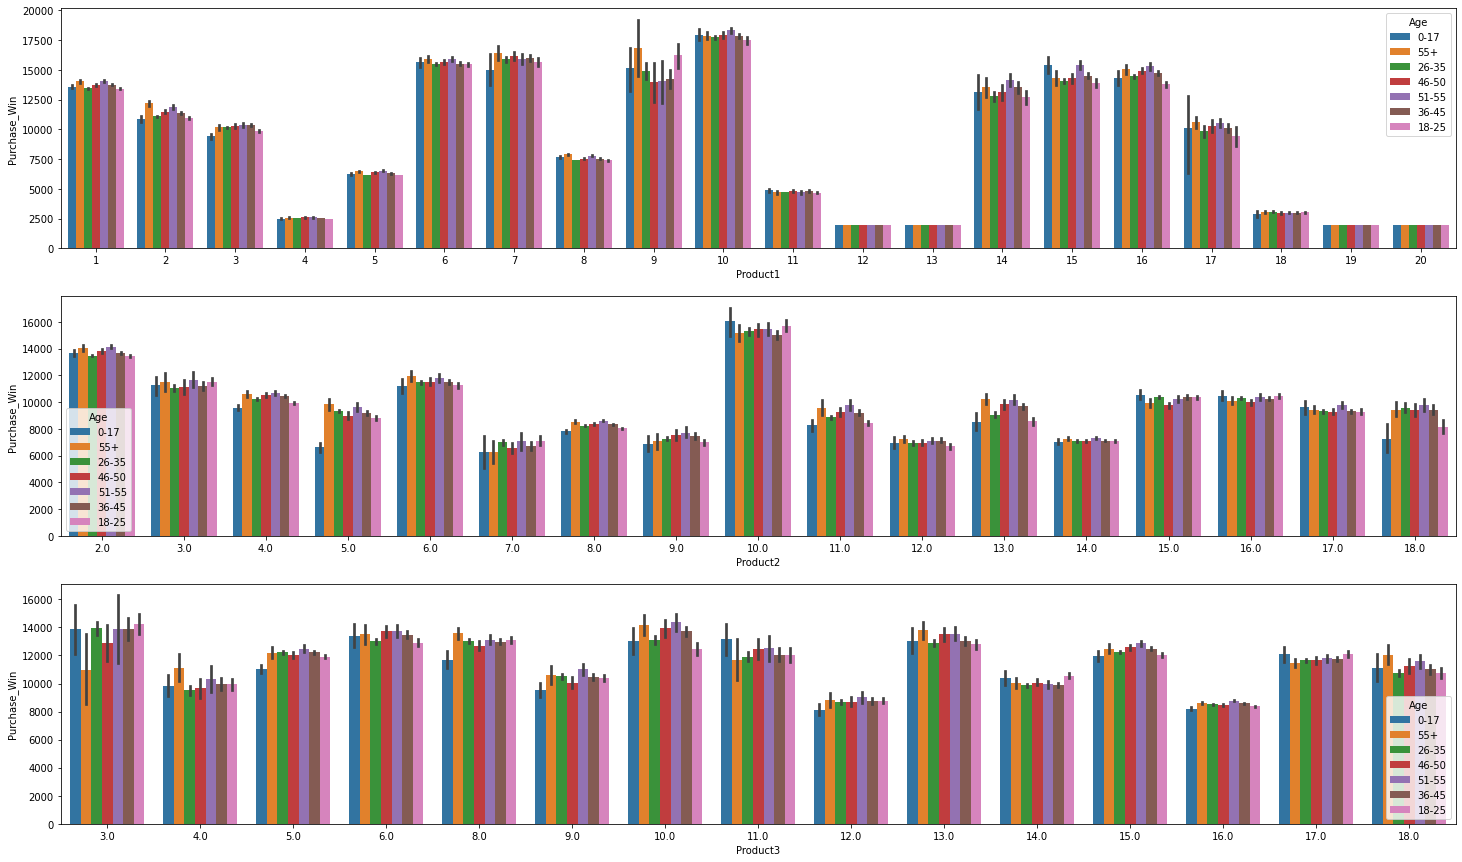

In [69]:
plt.figure(figsize=(25,15))

plt.subplot(3,1,1)
sns.barplot(x='Product1',y='Purchase_Win',hue='Age',data=data)

plt.subplot(3,1,2)
sns.barplot(x='Product2',y='Purchase_Win',hue='Age',data=data)

plt.subplot(3,1,3)
sns.barplot(x='Product3',y='Purchase_Win',hue='Age',data=data)

Berdasarkan Gambar Barchart di atas dapat dilihat bahwa masing-masing kategori Umur pada tiap kategori Product memiliki jumlah Purchase yang kurang lebih sama. Padahal jumlah kaetgori umur (Age) terbanyak terdapat pada kategori umur 26-35 tahun. Hal tersebut menandakan bahwa tiap kategori umur (Age) membeli product dengan jumlah yang bervariasi pada tiap kategorinya sehingga memungkinkan jumlah Purchasenya bisa mengakibatkan hasil yang hampir sama.


